In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [14]:
import pandas as pd
import numpy as np


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install neattext


In [19]:
import neattext.functions as nfx

In [119]:
#read_file = pd.read_excel (r'test_nor_811.xlsx')
#read_file.to_csv (r'test_nor_811.csv', index = None, header=True)

read_file = pd.read_excel (r'train_nor_811.xlsx')
read_file.to_csv (r'train_nor_811.csv', index = None, header=True)

read_file = pd.read_excel (r'valid_nor_811.xlsx')
read_file.to_csv (r'valid_nor_811.csv', index = None, header=True)

In [268]:
#df = pd.read_csv('test_nor_811.csv')
df = pd.read_csv('train_nor_811.csv')
#df = pd.read_csv('valid_nor_811.csv')

In [269]:
df.head()

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...


In [270]:
df.shape

(5548, 3)

In [271]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Sentence      object
dtype: object

In [272]:
df.isnull().sum()

Unnamed: 0    0
Emotion       0
Sentence      0
dtype: int64

In [273]:
df.Emotion.value_counts()

Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: Emotion, dtype: int64

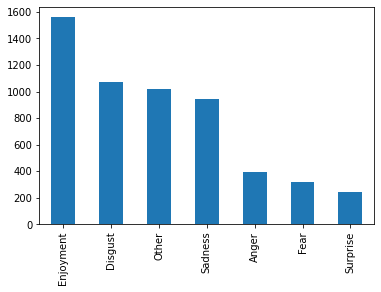

In [274]:
df.Emotion.value_counts().plot(kind = 'bar')

Sentiment analysis

In [275]:
from textblob import TextBlob

In [276]:
!pip install underthesea


In [277]:
from underthesea import sentiment


In [278]:
sentiment('i cười')

'positive'

In [279]:
df['Sentiment'] = df['Sentence'].apply(sentiment)

In [280]:
df.head()

,Unnamed: 0,Emotion,Sentence,Sentiment
0,188,Other,cho mình xin bài nhạc tên là gì với ạ,None
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...,None
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...,positive
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :)),None
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...,negative


In [281]:
# compare our emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion    Sentiment
Anger      negative     168
           positive      18
Disgust    negative     455
           positive     125
Enjoyment  negative     425
           positive     551
Fear       negative     166
           positive      48
Other      negative     340
           positive     136
Sadness    negative     476
           positive     115
Surprise   negative      54
           positive      74
dtype: int64

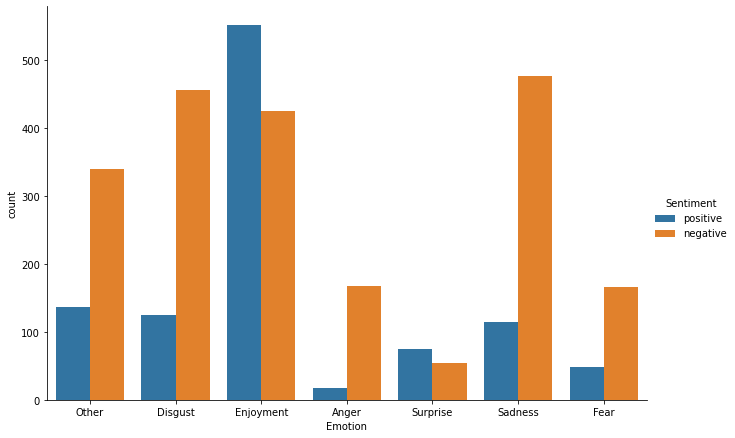

In [282]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size = 6,aspect=1.5)

In [283]:
df['Clean_sentence']= df['Sentence'].apply(nfx.remove_userhandles)

In [284]:
df['Clean_sentence']= df['Sentence'].apply(nfx.remove_punctuations)

In [285]:
df['Clean_sentence']= df['Sentence'].apply(nfx.remove_emojis)

In [286]:
df['Clean_sentence']= df['Sentence'].apply(nfx.remove_stopwords)

In [287]:
df[['Sentence','Clean_sentence']]

,Sentence,Clean_sentence
0,cho mình xin bài nhạc tên là gì với ạ,cho mình xin bài nhạc tên là gì với ạ
1,cho đáng đời con quỷ . về nhà lôi con nhà mày ...,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,lo học đi . yêu đương lol gì hay lại thích học...,lo học đi . yêu đương lol gì hay lại thích học...
3,uớc gì sau này về già vẫn có thể như cụ này :)),uớc gì sau này về già vẫn có thể như cụ này :))
4,mỗi lần có video của con là cứ coi đi coi lại ...,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
5543,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,nhìn mặt héo queo luôn,nhìn mặt héo queo luôn
5545,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,thích thân hình boss rồi nhan 😌,thích thân hình boss rồi nhan 😌


In [288]:
from collections import Counter

In [289]:
def extract_keyword(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [290]:
emotion_list = df['Emotion'].unique().tolist()

In [291]:
emotion_list

['Other', 'Disgust', 'Enjoyment', 'Anger', 'Surprise', 'Sadness', 'Fear']

In [292]:
anger_list=df[df['Emotion']== 'Anger']['Clean_sentence'].tolist()

In [293]:
anger_docx=' '.join(anger_list)

In [294]:
anger_docx

'thằng kia sao mày bắt vợ với bồ tao dọn thế kia . nhà mày ở đâu tao đến thịt mày chết ko phải con mình , mà xem còn thấy đau như vậy huống gì người trong cuộc . thật là phẫn nộ mà . cơ quan chức năng làm việc quá chậm trễ , đến giờ mà vẫn chưa tìm ra người chịu trách nhiệm . 😠😠😠😠😠😠 con chó đăng video , mày bị ngu à mà mỗi mẩu lại hiện chữ ăn cặc à cá nhân mình nghĩ nó dừng hay đỗ đúng sai thì đã có pạt còn nó đỗ trước cửa nhà mình mà oto hay xe không ra vào được thì lúc đó mới ý kiến . công nhận bọn oto đỗ trước nhà nhìn chỉ muốn đốt đéo được tích sự gì 😂 mày coi chừng có ngày tao dã dô mặt mày như dzầy mày cẩn thận tao giết đóng cái lồn tao nè chứ đóng địt mẹ không có cái loại nào nó ác man và tàn độc hơn là cái loại người . xem mà điên đéo chịu được nhận nhầm con cặc . phải nói là 10 thằng thì 1 thằng nuôi con thằng khác gặm gặm cái đéo ý à ... bố gặm luôn mày giờ ...!!! tử hình con mẹ nó lũ chó má không có tính người đi . khổ thân lũ trẻ nói thật tao hiền lắm . chứ bà lồn kia mà gặ

In [295]:
#Extract Keywords
keyword_anger = extract_keyword(anger_docx)

In [296]:
keyword_anger

{',': 122,
 '.': 211,
 'bọn': 33,
 'bố': 32,
 'cho': 100,
 'chó': 30,
 'chúng': 30,
 'chết': 35,
 'chứ': 31,
 'con': 106,
 'cái': 85,
 'còn': 44,
 'có': 69,
 'cũng': 32,
 'cả': 29,
 'dume': 26,
 'gì': 65,
 'hết': 28,
 'không': 104,
 'luôn': 29,
 'là': 77,
 'làm': 43,
 'lũ': 29,
 'lại': 31,
 'mà': 87,
 'mày': 86,
 'mất': 29,
 'mấy': 37,
 'mẹ': 79,
 'người': 72,
 'nhà': 35,
 'như': 41,
 'nào': 34,
 'này': 63,
 'nó': 113,
 'nói': 28,
 'phải': 45,
 'ra': 52,
 'rồi': 55,
 'tao': 139,
 'thì': 81,
 'thấy': 24,
 'thằng': 49,
 'thế': 44,
 'vào': 39,
 'vậy': 25,
 'ăn': 37,
 'đi': 78,
 'đéo': 56,
 'được': 33}

In [297]:
def plot_most_common_words(mydict):
  df_01 =pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize= (20,10))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation = 45)
  plt.show()

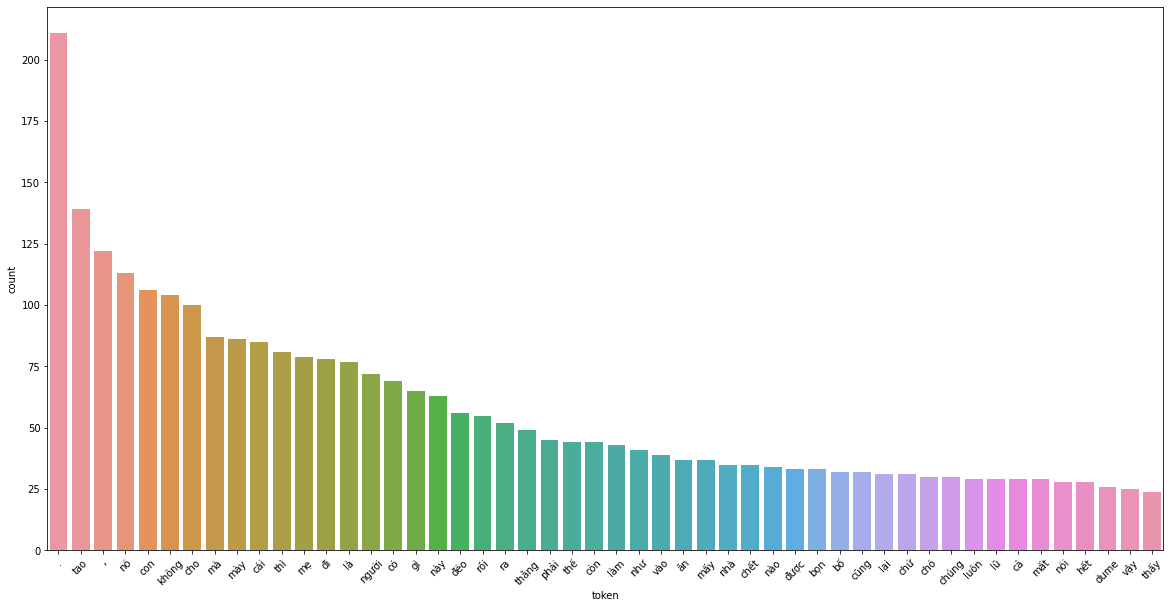

In [298]:
plot_most_common_words(keyword_anger)

In [299]:
from wordcloud import WordCloud

In [300]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

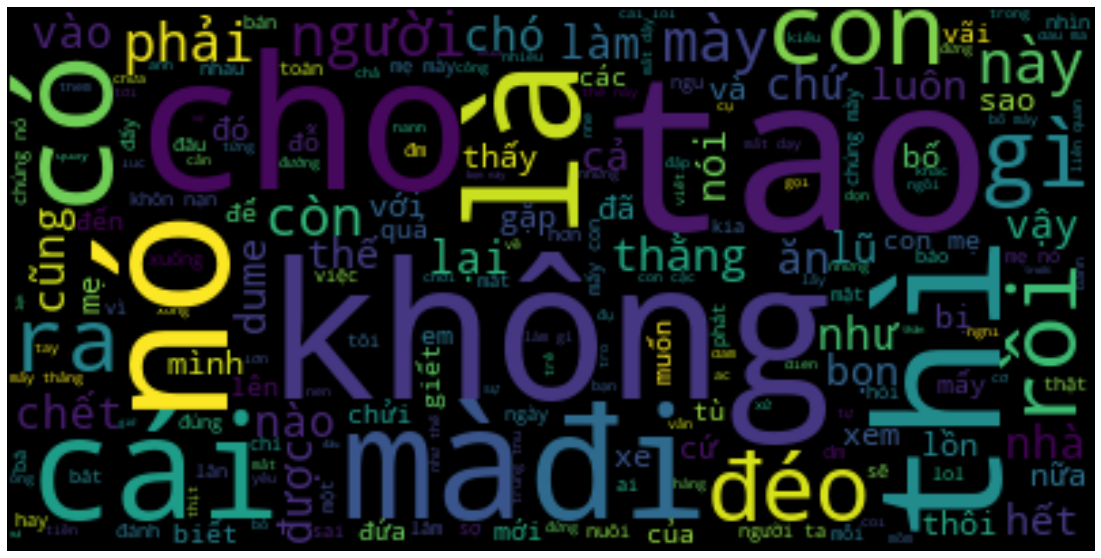

In [301]:
plot_wordcloud(anger_docx)

Machine Learning

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [303]:
#Split our dataset
from sklearn.model_selection import train_test_split

In [304]:
###BUild feature from our text
Xfeatures = df['Clean_sentence']
ylabels= df['Emotion']


In [305]:
Xfeatures

0                   cho mình xin bài nhạc tên là gì với ạ
1       cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2       lo học đi . yêu đương lol gì hay lại thích học...
3         uớc gì sau này về già vẫn có thể như cụ này :))
4       mỗi lần có video của con là cứ coi đi coi lại ...
                              ...                        
5543    đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544                               nhìn mặt héo queo luôn
5545    tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546                      thích thân hình boss rồi nhan 😌
5547    ước mơ nhỏ nhoi của tao là được làm chị mà khô...
Name: Clean_sentence, Length: 5548, dtype: object

In [306]:
# Vectorizer
cv = CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [307]:
cv.get_feature_names()

['01',
 '10',
 '100',
 '100k',
 '100tr',
 '10k',
 '10km',
 '10m',
 '10p',
 '10tr',
 '11',
 '12',
 '13',
 '13t',
 '14',
 '15',
 '150trieu',
 '15t',
 '17',
 '1700',
 '17t',
 '18',
 '1967',
 '1h',
 '1imdb',
 '1m87',
 '20',
 '200',
 '2000',
 '200k',
 '200tr',
 '2012',
 '2015',
 '2016',
 '2020',
 '2021',
 '20m',
 '20p',
 '21',
 '22',
 '225k',
 '22k',
 '23',
 '23h',
 '24',
 '24tr',
 '25',
 '26',
 '28',
 '2_3',
 '2ce',
 '2cm',
 '2e',
 '2k',
 '2tr',
 '30',
 '3000',
 '300k',
 '30k',
 '30p',
 '30s',
 '30tr',
 '320',
 '333',
 '33333',
 '3d',
 '3h',
 '3s',
 '40',
 '400k',
 '40k',
 '42',
 '45k',
 '48',
 '4tr',
 '50',
 '5000',
 '500d',
 '500tr',
 '500đ',
 '50k',
 '580k',
 '5cm',
 '5k',
 '5tr',
 '60',
 '63',
 '66',
 '6h',
 '6sms',
 '75',
 '78',
 '7nam',
 '80',
 '800',
 '81',
 '850',
 '8h',
 '90',
 '900ml',
 '99',
 '99999',
 '9p',
 '9x',
 'aaaaa',
 'aaaaaaa',
 'aamir',
 'abcxyz',
 'ac',
 'ad',
 'add',
 'adim',
 'admin',
 'ae',
 'aeon',
 'agri',
 'agribank',
 'ah',
 'ahahahaha',
 'ahihi',
 'ahuhuhu',
 

In [308]:
#Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size = 0.3,random_state=42)

In [309]:
# Build model
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinominalNB()

In [310]:
#Acuracy
nv_model.score(X_test, y_test)

0.4858858858858859

In [311]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [312]:
y_pred_for_nv

array(['Disgust', 'Anger', 'Enjoyment', ..., 'Disgust', 'Disgust',
       'Enjoyment'], dtype='<U9')

Model Evaluation

In [313]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       Anger       0.48      0.23      0.32       115
     Disgust       0.47      0.57      0.52       356
   Enjoyment       0.55      0.68      0.60       451
        Fear       0.65      0.27      0.38       104
       Other       0.35      0.34      0.35       307
     Sadness       0.51      0.53      0.52       267
    Surprise       0.17      0.02      0.03        65

    accuracy                           0.49      1665
   macro avg       0.45      0.38      0.39      1665
weighted avg       0.48      0.49      0.47      1665



In [314]:
#Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 27,  49,  11,   0,  20,   8,   0],
       [ 16, 203,  58,   5,  48,  25,   1],
       [  1,  46, 305,   4,  42,  50,   3],
       [  2,  22,  28,  28,  16,   8,   0],
       [  6,  64,  82,   5, 104,  45,   1],
       [  4,  31,  49,   0,  42, 141,   0],
       [  0,  14,  26,   1,  21,   2,   1]])

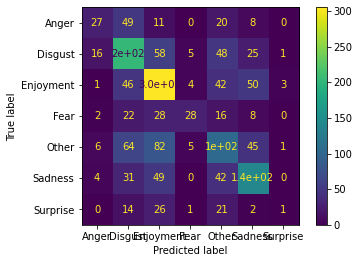

In [315]:
plot_confusion_matrix(nv_model,X_test,y_test)